In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

path = str(Path(Path('thermo.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from tools.cbook import pickle2Obj

import pickle

_nthreads = 2

plot_attr   = { 
                "mpas":  {"name":"MPAS",    "color": 'r',   'linewidth': 2.0, 'linestyle': 'solid'},
                "mpas-wof":  {"name":"MPAS-WOF", "color": 'g',   'linewidth': 1.0, 'linestyle': 'solid'},
                "cm1":   {"name":"CM1",   "color": 'b',   'linewidth': 2.0, 'linestyle': 'solid'},
                "wrf":   {"name":"WRF",   "color": 'k',   'linewidth': 2.0, 'linestyle': 'solid'  }
               }
def get_plot_attr(model_key, p_attr, run_label=False):
    
    alist = ['name', 'linewidth', 'linestyle', 'color']
    
    attrs = []
    
    for item in alist:
        attrs.append(p_attr[model_key][item])
        
    if run_label:
        for n, item in enumerate(alist):
            try:
                if item in p_attr[model_key][run_label]:
                    attrs[n] = p_attr[model_key][run_label][item]
            except KeyError:
                break
                     
    # print(attrs)
    
    return attrs


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# # Set profiles up

wrf_dir  = '/work/wicker/climate_runs/WRF/WRF_v4.4.2/ideal/base'
cm1_dir  = '/work/wicker/climate_runs/cm1r20.3/run/base'
mpas_dir = '/work/wicker/climate_runs/MPAS/squall/base'
#wpas_dir = '/work/wicker/climate_runs/MPAS/squall/wofs'

models = {}

models['wrf']      = pickle2Obj(os.path.join(wrf_dir, 'profile.pkl'),retObj=False)
models['cm1']      = pickle2Obj(os.path.join(cm1_dir, 'profile.pkl'),retObj=False)
models['mpas']     = pickle2Obj(os.path.join(mpas_dir, 'profile.pkl'),retObj=False)
#models['mpas-wof'] = pickle2Obj(os.path.join(wpas_dir, 'profile.pkl'),retObj=False)




In [34]:
#----------------------------------------------------
def plot_sizes_driver(models, step = [1,-1], plabel = "", 
                      plotcape = ["C2000", "C3500"], plotshear=["06", "18"], 
                      my_plot_attr=None):
    
    imin = step[1]
    if imin < 0:
        imin = 24
    hour = float(imin)*15/60

    titles = ["0-%2.0f Hour Cumulative Dist. of Updraft Size in Pixels" % hour]

    for cape in plotcape:

        for shear in plotshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(5,10))
            
            for key in models:
                
                mdata = models[key]

                t0 = mdata[label]['tindex'][step[0]]
                t1 = mdata[label]['tindex'][step[1]]
                ss = np.sort(mdata[label]['size'][t0:t1])

                zhgt = np.arange(len(ss))/float(len(ss))
                                    
                # check for specific styles for runs
                
                if my_plot_attr == None:  # use local values
                    name, linew, lines, color  = get_plot_attr(key, plot_attr, run_label=label)

                else:
                    name, linew, lines, color  = get_plot_attr(key, my_plot_attr, run_label=label)
                    
                print(key, name, linew, lines, color)
                   
                ax.plot(ss, zhgt, color=color, linewidth=linew, linestyle=lines, label='%s (%d)' % (name, len(ss)))

                ax.set_title("%s" % (titles[0]), fontsize=12)
                ax.axhline(y=0.5, color='k', linestyle='--')
                ax.axhline(y=0.9,  color='k', linestyle='--')

                ax.annotate('50%',
                        xy=(48, 0.5),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

                ax.annotate('90%',
                        xy=(3, 0.9),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

                ax.set_ylim(0.0,1.1)
                ax.set_xlim(0,50)
                ax.legend(fontsize=14, loc='lower right')
            
            plt.suptitle("%s %s" % (plabel, label), fontsize=18)
            plt.savefig("Pixel_Size_%s.png" % (label))

            

wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r
mpas-wof MPAS-WOF 1.0 solid g
wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r
mpas-wof MPAS-WOF 1.0 solid g
wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r
mpas-wof MPAS-WOF 1.0 solid g
wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r
mpas-wof MPAS-WOF 1.0 solid g


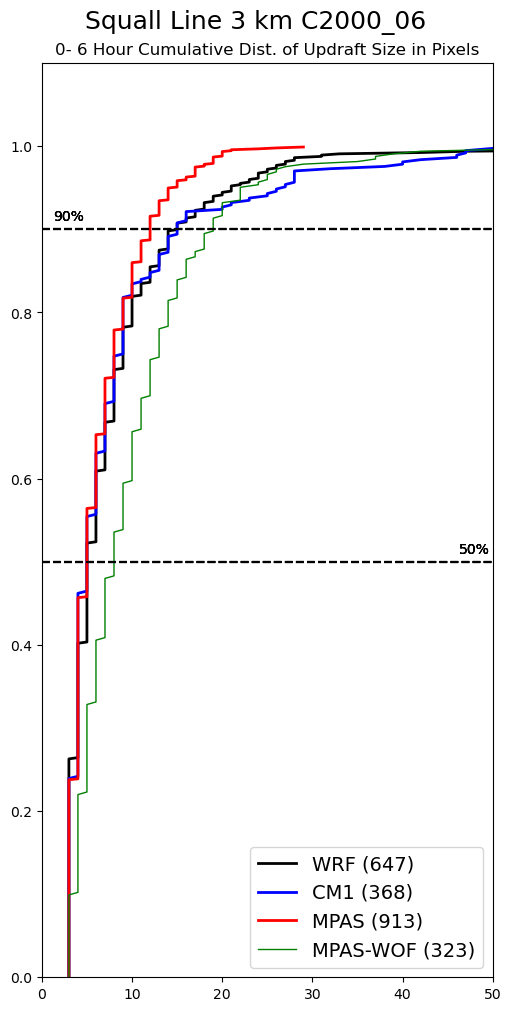

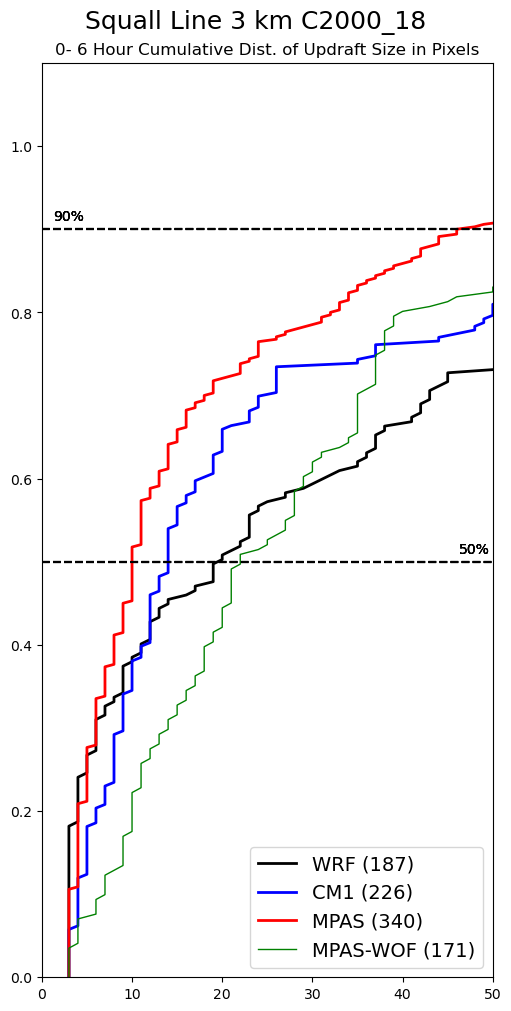

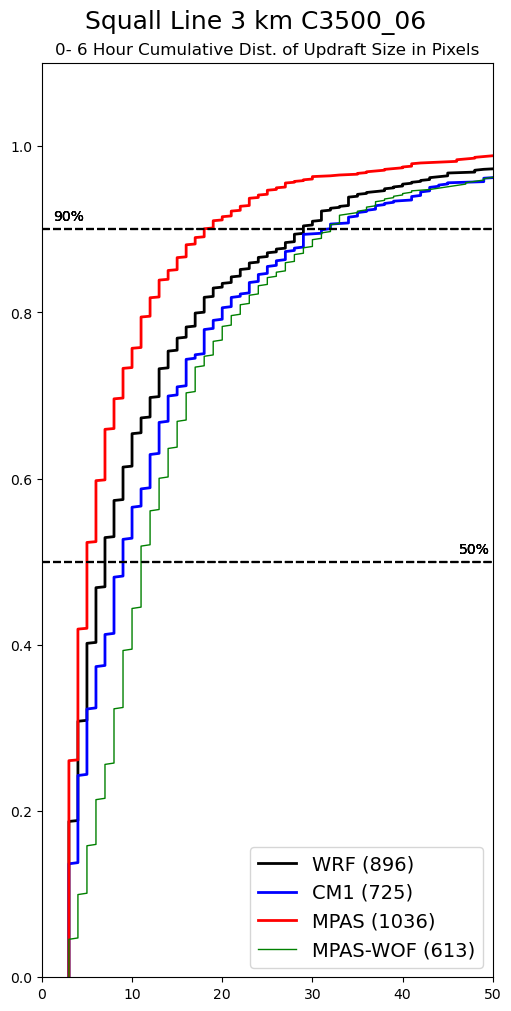

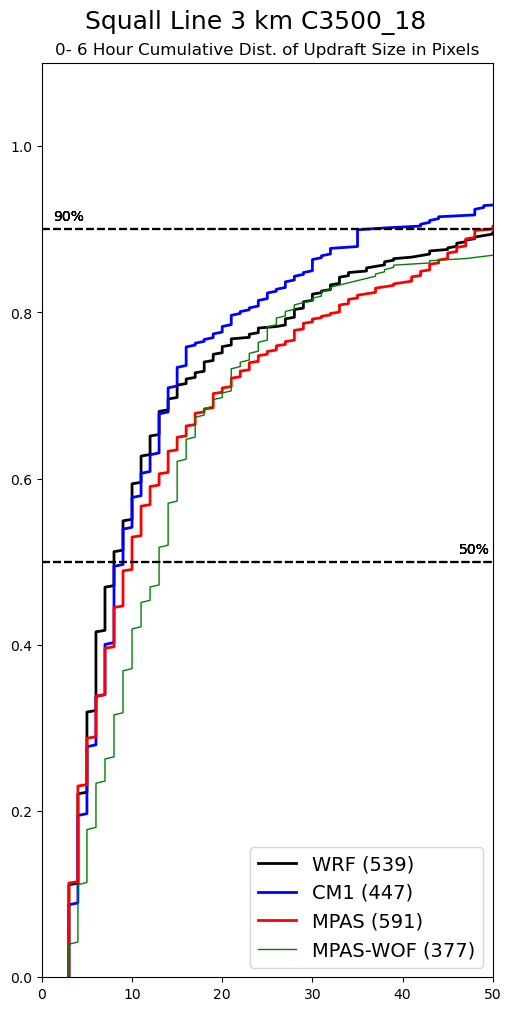

In [35]:
plot_sizes_driver( models, plabel = 'Squall Line 3 km' )

In [2]:
#----------------------------------------------------
def plot_sizes_driverAGG(models, step = [1,-1], plabel = "", my_plot_attr=None):
    
    imin = step[1]
    if imin < 0:
        imin = 24
    hour = float(imin)*15/60

    titles = ["0-%d Hour Cumulative Dist. of Updraft Size in Pixels" % int(hour)]
     
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(5,10))

    labels =   ['C2000_06',
                'C2500_06',
                'C3000_06',
                'C3500_06',
                'C2000_12',
                'C2500_12',
                'C3000_12',
                'C3500_12',
                'C2000_18',
                'C2500_18',
                'C3000_18',
                'C3500_18']
    
    for key in models.keys():
            
        index = 0

        for label in labels:

            mdata = models[key]

            t0 = mdata[label]['tindex'][step[0]]
            t1 = mdata[label]['tindex'][step[1]]

            if index == 0:
                ss = mdata[label]['size'][t0:t1]
            else:
                ss = np.append(ss, mdata[label]['size'][t0:t1])
                
            index += 1
            
        ss = np.sort(ss)

        zhgt = np.arange(len(ss))/float(len(ss))
                            
        # check for specific styles for runs
        
        if my_plot_attr == None:  # use local values
            name, linew, lines, color  = get_plot_attr(key, plot_attr, run_label=label)

        else:
            name, linew, lines, color  = get_plot_attr(key, my_plot_attr, run_label=label)
            
        print(key, name, linew, lines, color)
           
        ax.plot(ss, zhgt, color=color, linewidth=linew, linestyle=lines, label='%s (%d)' % (name, len(ss)))

        ax.set_title("%s" % (titles[0]), fontsize=12)
        ax.axhline(y=0.5, color='k', linestyle='--')
        ax.axhline(y=0.9,  color='k', linestyle='--')

        ax.annotate('50%',
                xy=(48, 0.5),
                xytext=(0, 4),  # 4 points vertical offset.
                textcoords='offset points',
                ha='center', va='bottom')

        ax.annotate('90%',
                xy=(3, 0.9),
                xytext=(0, 4),  # 4 points vertical offset.
                textcoords='offset points',
                ha='center', va='bottom')

        ax.set_ylim(0.0,1.1)
        ax.set_xlim(0,50)
        ax.legend(fontsize=14, loc='lower right')
    
    plt.suptitle("%s Object Size" % (plabel), fontsize=18)
    plt.savefig("Pixel_Size_ALL.png" )

wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r


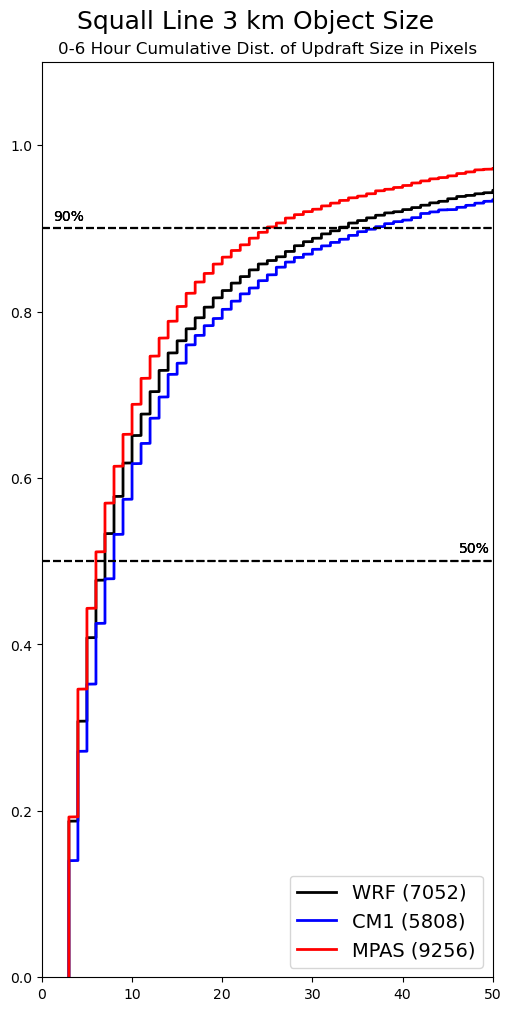

In [3]:
# # Set profiles up

wrf_dir  = '/work/wicker/climate_runs/WRF/WRF_v4.4.2/ideal/base'
cm1_dir  = '/work/wicker/climate_runs/cm1r20.3/run/base'
mpas_dir = '/work/wicker/climate_runs/MPAS/squall/base'
#wpas_dir = '/work/wicker/climate_runs/MPAS/squall/wofs'

models = {}

models['wrf']      = pickle2Obj(os.path.join(wrf_dir, 'profile.pkl'),retObj=False)
models['cm1']      = pickle2Obj(os.path.join(cm1_dir, 'profile.pkl'),retObj=False)
models['mpas']     = pickle2Obj(os.path.join(mpas_dir, 'profile.pkl'),retObj=False)
#models['mpas-wof'] = pickle2Obj(os.path.join(wpas_dir, 'profile.pkl'),retObj=False)

plot_sizes_driverAGG( models, plabel = 'Squall Line 3 km' )

wrf WRF 2.0 solid k
cm1 CM1 2.0 solid b
mpas MPAS 2.0 solid r
mpas-wof MPAS-WOF 1.0 solid g


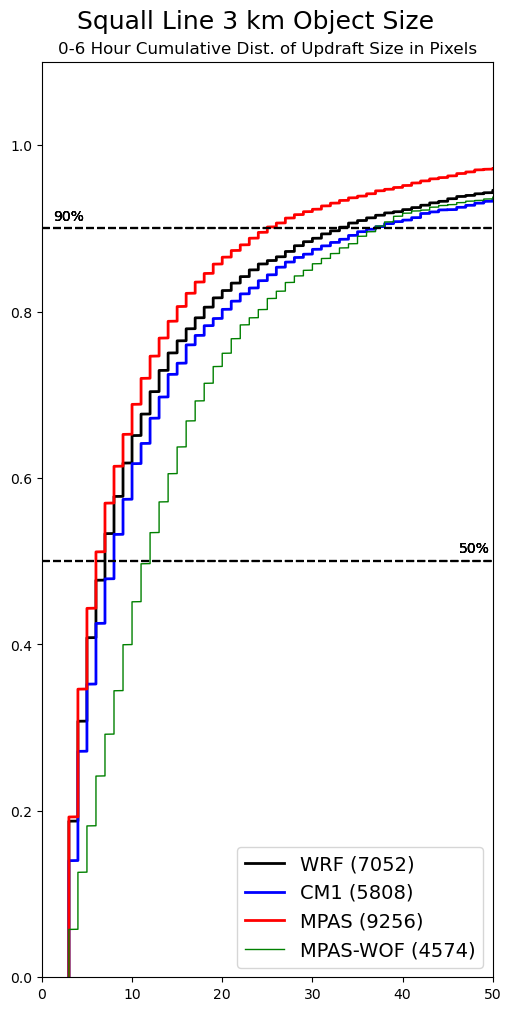

In [4]:
# # Set profiles up

wrf_dir  = '/work/wicker/climate_runs/WRF/WRF_v4.4.2/ideal/base'
cm1_dir  = '/work/wicker/climate_runs/cm1r20.3/run/base'
mpas_dir = '/work/wicker/climate_runs/MPAS/squall/base'
wpas_dir = '/work/wicker/climate_runs/MPAS/squall/wofs'

models = {}

models['wrf']      = pickle2Obj(os.path.join(wrf_dir, 'profile.pkl'),retObj=False)
models['cm1']      = pickle2Obj(os.path.join(cm1_dir, 'profile.pkl'),retObj=False)
models['mpas']     = pickle2Obj(os.path.join(mpas_dir, 'profile.pkl'),retObj=False)
models['mpas-wof'] = pickle2Obj(os.path.join(wpas_dir, 'profile.pkl'),retObj=False)
plot_sizes_driverAGG( models, plabel = 'Squall Line 3 km' )

In [ ]:
#--------------------------------------------------------------------------------------------
# define w / t / theta plotting

def plot_wptpth_driver(cm1, wrf, fv3, plabel = ""):

    titles = ["Updraft Profiles", "Pert. Temp Profiles", "Pert. Pressure (Pa) Profiles"]

    xvert  = [6.0, 8.0, 12.5]
    xlim   = [8., 15.0, 20.0]

    zhgts = 250. + 250.*np.arange(100)

    allcape = ( "C2000","C3500")
    allshear = ("06", "18")
    
    s = [1,24]
    m = 0

    for cape in allcape:

        label = []

        for shear in allshear:   # create dictionary names

            label.append("%s_%s" % (cape, shear))
        
        fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
        
        for n, variable in enumerate(['w', 'pert_t', 'pert_p']):
                        
            plot_profile(cm1[label[0]], variable, zhgts, m, ax[n], 'b', 'CM1_06', step=s, linewidth=0.5)
            plot_profile(cm1[label[1]], variable, zhgts, m, ax[n], 'b', 'CM1_12', step=s, linewidth=1.0)
            plot_profile(cm1[label[2]], variable, zhgts, m, ax[n], 'b', 'CM1_18', step=s, linewidth=2.0)

            plot_profile(wrf[label[0]], variable, zhgts, m, ax[n], 'k', 'WRF_06', step=s, linewidth=0.5)
            plot_profile(wrf[label[1]], variable, zhgts, m, ax[n], 'k', 'WRF_12', step=s, linewidth=1.0)
            plot_profile(wrf[label[2]], variable, zhgts, m, ax[n], 'k', 'WRF_18', step=s, linewidth=2.0)
                        
            plot_profile(fv3[label[0]], variable, zhgts, m, ax[n], 'r', 'FV3_06', step=s, linewidth=0.5)
            plot_profile(fv3[label[1]], variable, zhgts, m, ax[n], 'r', 'FV3_12', step=s, linewidth=1.0)
            plot_profile(fv3[label[2]], variable, zhgts, m, ax[n], 'r', 'FV3_18', step=s, linewidth=2.0)

            
            ax[n].set_title("%s" % titles[n], fontsize=18)
                                      
            ax[n].axhline(y=6000., color='k', linestyle='-')
            ax[n].axhline(y=8000., color='k', linestyle='-')
            ax[n].axhline(y=10000., color='k', linestyle='-')
            ax[n].axhline(y=12000., color='k', linestyle='-')

            ax[n].set_ylim(0.0,25000.) 
                                       
            if n == 0:
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].axvline(x=xvert[n], color='k', linestyle='--')
                ax[n].legend(fontsize=12, loc='upper right')
                ax[n].set_xlim(-3.0,xlim[n])
               
            elif n == 1:
                ax[n].legend(fontsize=12, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-7.,7.0)
            else:
                ax[n].legend(fontsize=12, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-800, 400)

        plt.suptitle("%s  CAPE = %s" % (plabel, cape[1:]), fontsize=24)
        plt.show()
        
#######################

In [35]:
#----------------------------------------------------
def plot_var_size(models, xvar = 'object_size', var='w', colors='k', xlim=[0,50], ylim=[0,20], depth=[0,40], max=True, msize=80, alpha=1.0, marker=".", plabel=""):
    
    titles = ["0-6 Hour Updraft Sizes", "0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes"]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18")
    
    max_pix = xlim[1]
    
    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,4, constrained_layout=True,figsize=(28,7))
            
            for n, key in enumerate(models):
                
                mdata = models[key]
                
                t0 = mdata[label]['tindex'][0]
                t1 = mdata[label]['tindex'][20]

                if xvar == 'object_size':
                    size = mdata[label]['size'][t0:t1]
                else:
                    size = mdata[label][xvar][depth[0]:depth[1],t0:t1].mean(axis=0)
                    
                if max:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].max(axis=0)
                else:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].mean(axis=0)

                if key == 'solo':

                    if xvar == 'size':
                        ax[3].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='r', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[3].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f   MEAN of FLD:  %5.2f" % \
                                    ('FV3-SOLO', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[3].scatter(size, w,   s=msize, c='r', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[3].set_title("%s: MEAN of %s:  %5.2f" % ('FV3-SOLO', var, np.mean(w)), fontsize=20)

                if key == 'cm1':
                    if xvar == 'size':
                        ax[2].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='b', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[2].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f   MEAN of FLD:  %5.3f" % \
                                    ('CM1', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[2].scatter(size, w,   s=msize, c='b', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[2].set_title("%s: MEAN of %s:  %5.2f" % ('CM1', var, np.mean(w)), fontsize=20)

                if key == 'wrf':
                    if xvar == 'size':
                        ax[0].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='k', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[0].set_title("%s: \n Mean Size: %3.1f  MEAN of FLD:  %5.3f" % \
                                     ('WRF', np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[0].scatter(size, w,   s=msize, c='k', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[0].set_title("%s: MEAN of %s:  %5.2f" % ('WRF', var, np.mean(w)), fontsize=20)

                if key == 'mpas':
                    if xvar == 'size':
                        ax[1].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='g', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[1].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f MEAN of FLD:  %5.3f" % \
                                    ('MPAS', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)

                    else:
                        ax[1].scatter(size, w,   s=msize, c='g', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[1].set_title("%s: MEAN of %s:  %5.2f" % ('MPAS', var, np.mean(w)), fontsize=20)

                ax[n].set_xlim(xlim)
                ax[n].set_ylim(ylim[:])
                ax[n].set_xlabel("%s" % xvar.upper(), fontsize=14)
                ax[n].set_ylabel(var.upper() , fontsize=14)
            
            plt.suptitle("Experiment %s %s" % (plabel, label), fontsize=24)
            plt.savefig("Pixel_%s_2D_%s.png" % (var.upper(), label))

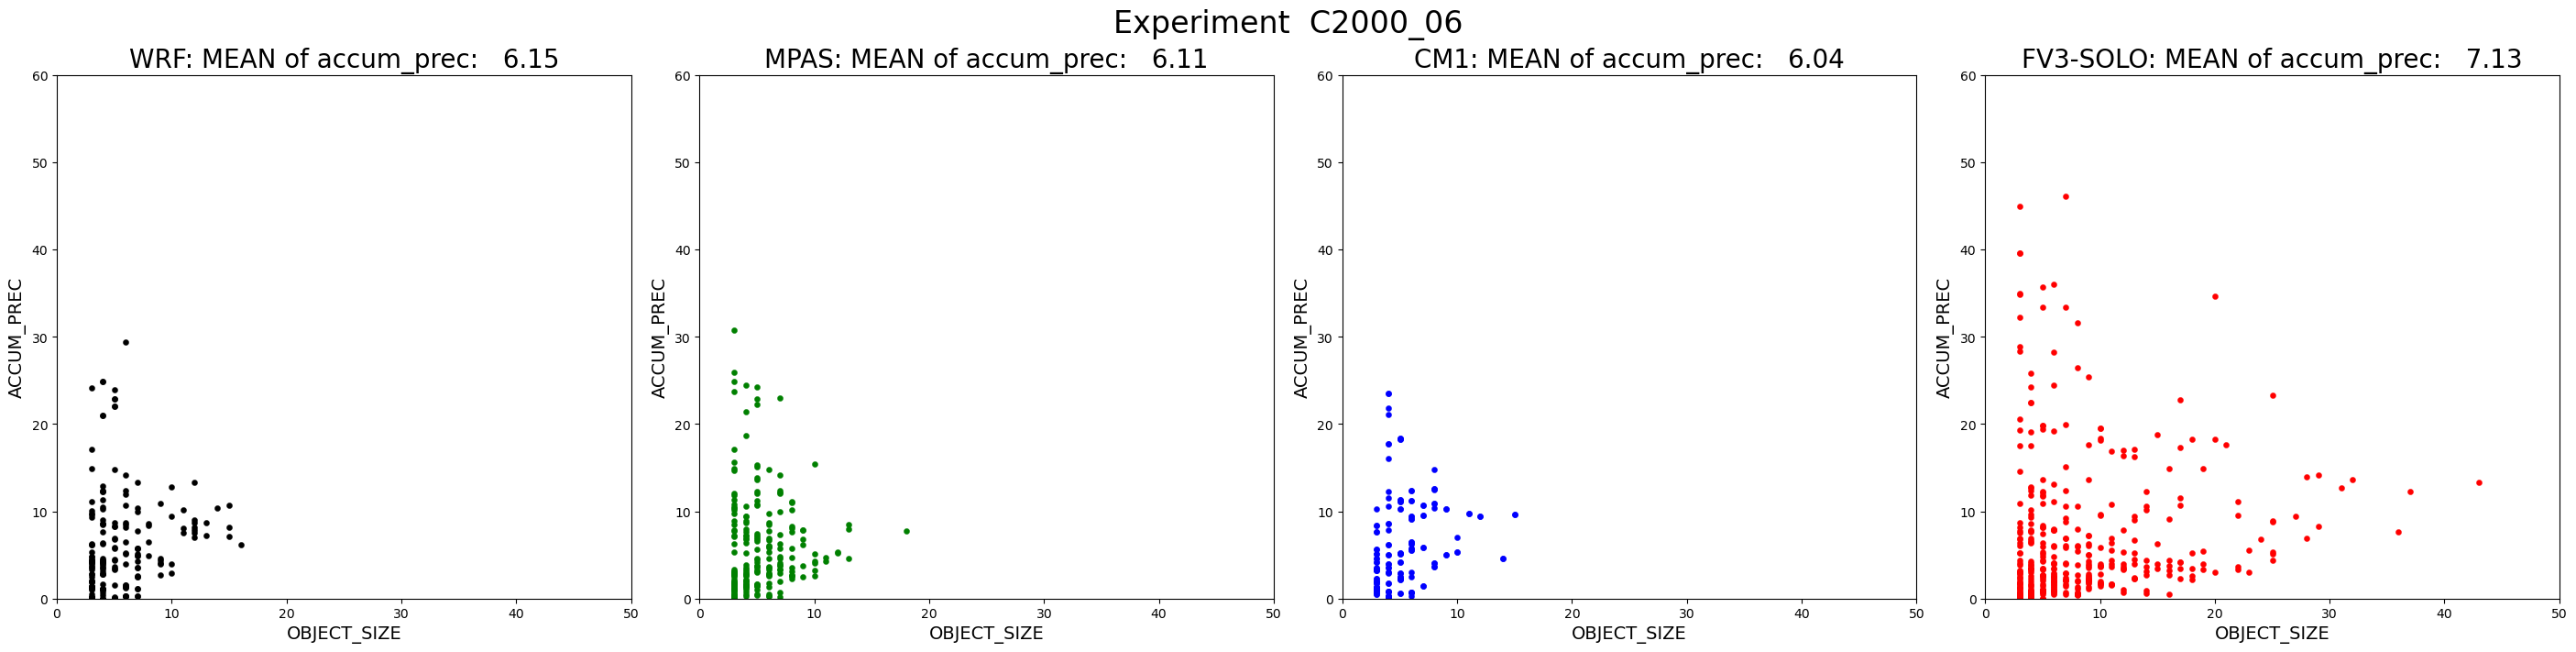

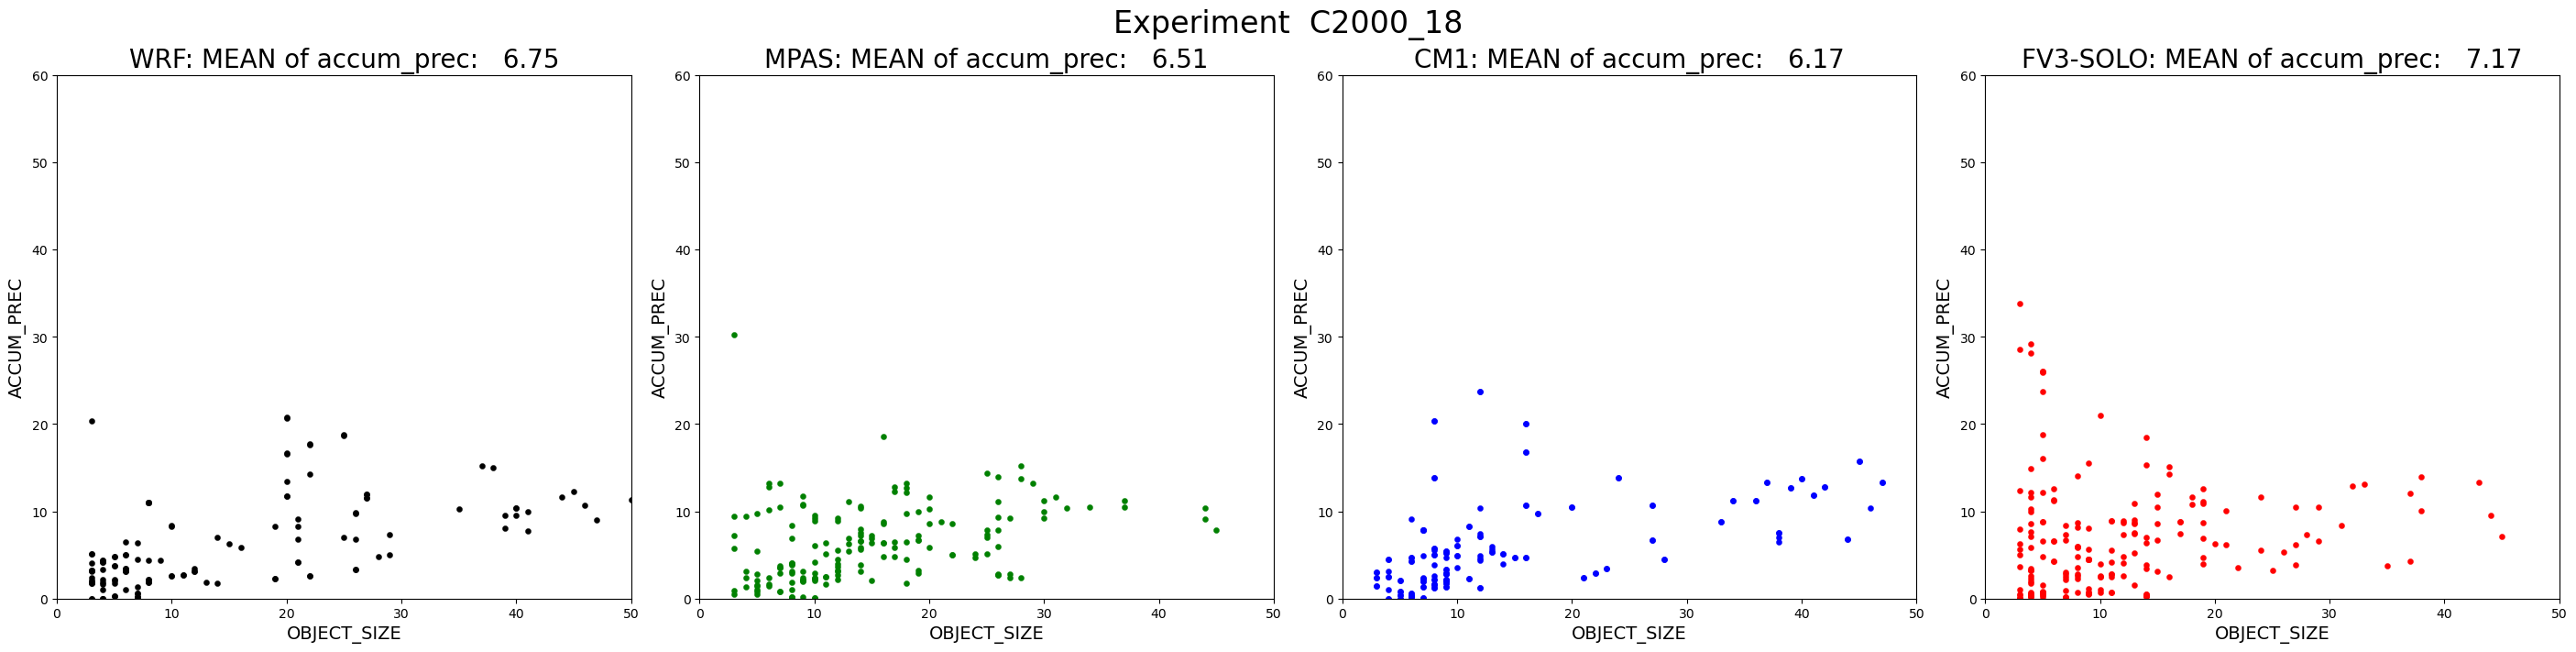

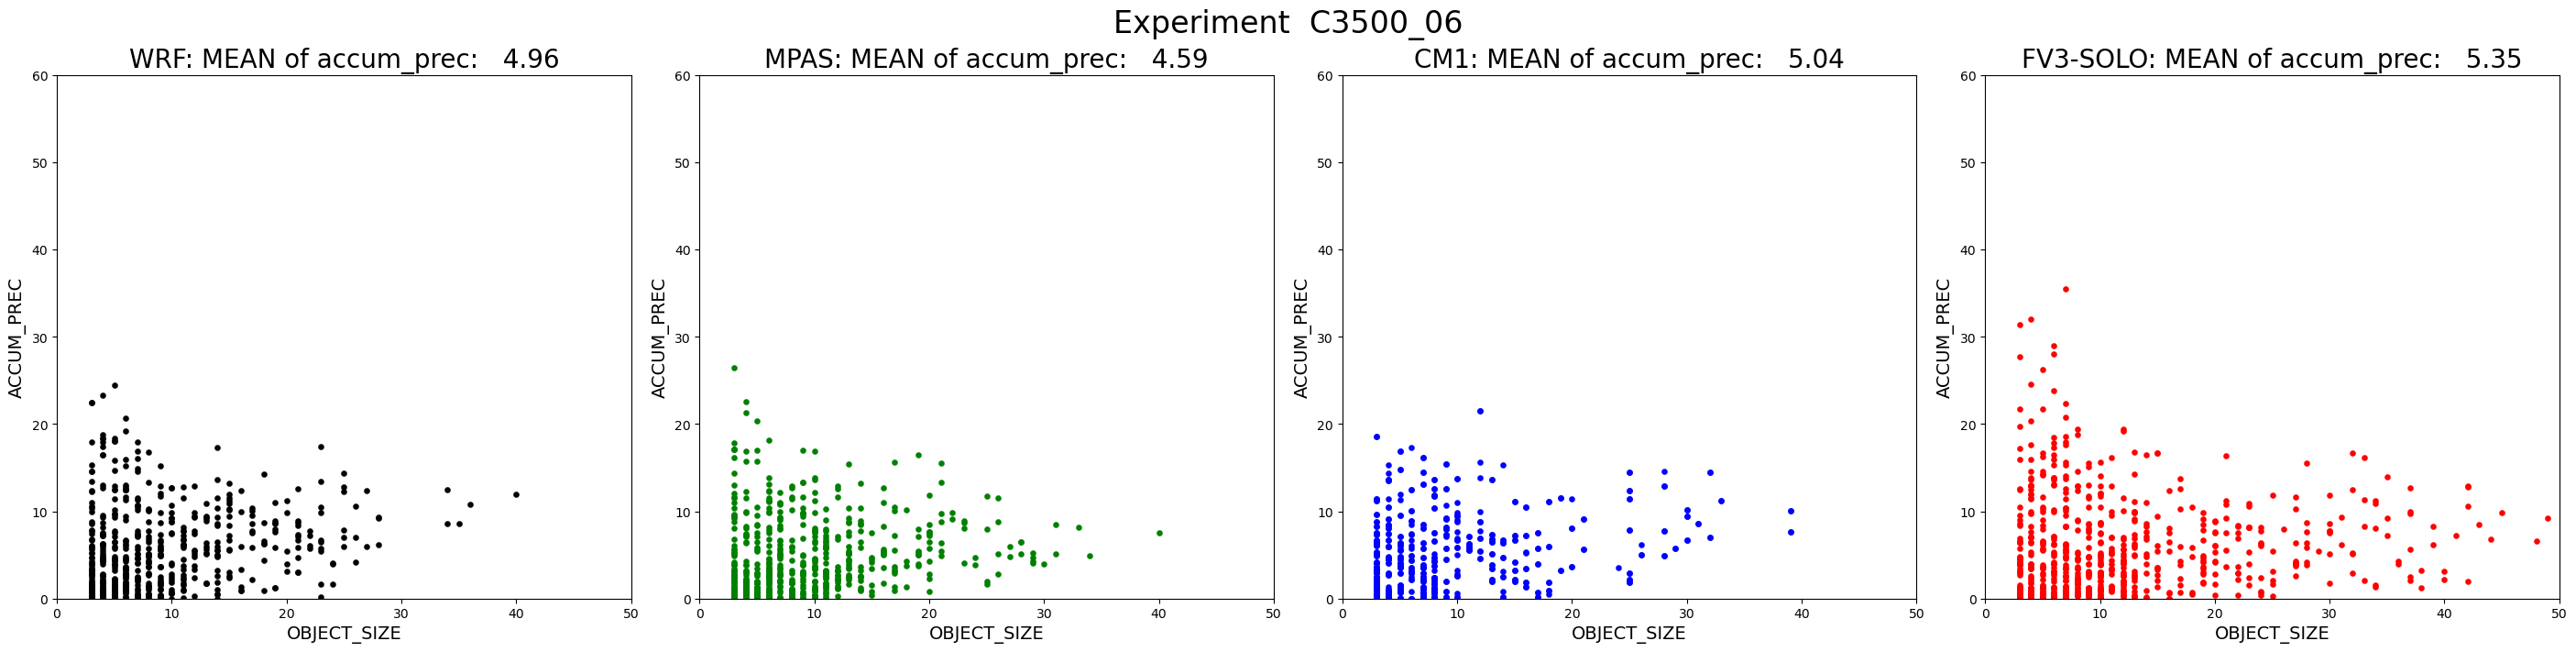

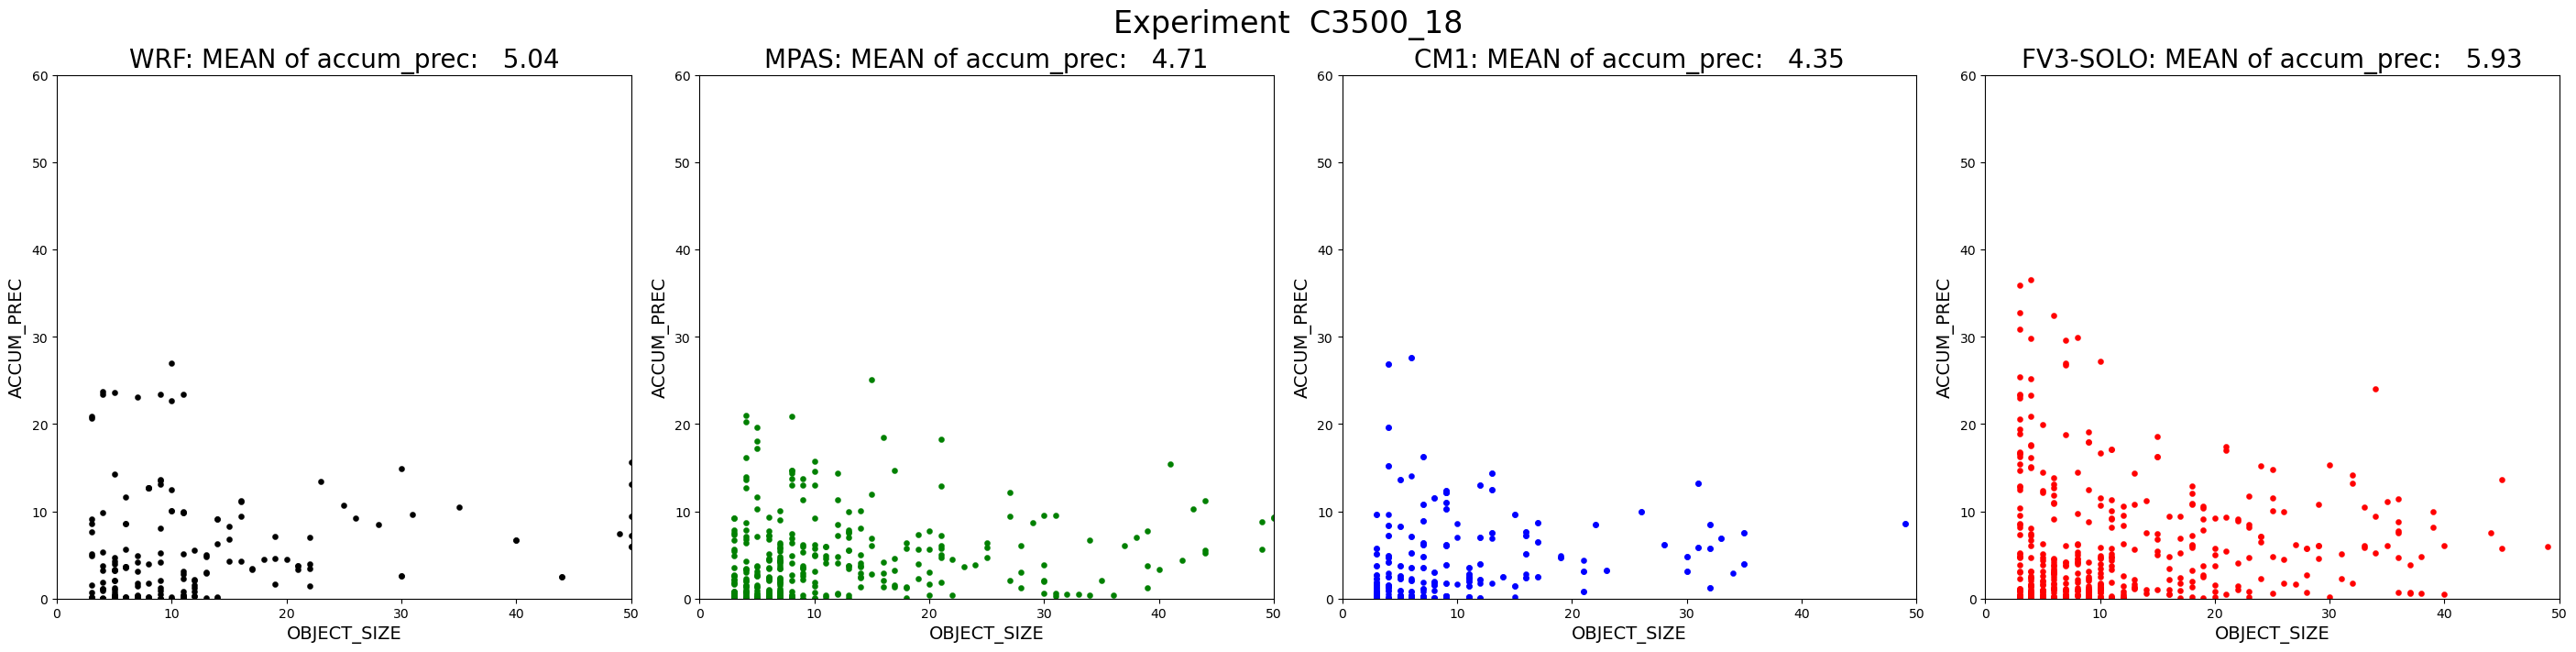

In [55]:
# label = "%s_%s" % ("C2000", "06")
# for key in models: 
#     mdata = models[key]
#     t0 = mdata[label]['tindex'][0]
#     t1 = mdata[label]['tindex'][8]
    
#     size = mdata[label]['size'][t0:t1]
#     w    = mdata[label]['w'][:,t0:t1].max(axis=0)
#     p    = mdata[label]['accum_prec'][:,t0:t1]
#     print(size.shape)
#     print(w.shape)

# plot_var_size(models, var='thetae', max_pix=50, depth=[0,40], xlim=[320,340], max=False)

#plot_var_size(models, xvar='w', var='accum_prec', depth=[0,40], xlim=[0,20], ylim=[0,60], msize=80, max=False)
# plot_var_size(models, var='buoy', depth=[0,40], ylim=[-0.1,0.1], msize=80, max=False)
plot_var_size(models, var='accum_prec', depth=[0,40], ylim=[0,60], max=True)
# plot_var_size(models, max_pix=50, depth=[0,40], ylim=[0,20], max=False)

In [51]:
#----------------------------------------------------
def mk_boxplot(models, var='w', colors='k', max_pix=100, ylim=[0,20], depth=[0,40], max=True, msize=80, alpha=1.0, marker=".", plabel="", **kwargs):
    
    titles = ["0-6 Hour Updraft Sizes", "0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes"]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18")
    
    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,4, constrained_layout=True,figsize=(16,7))
            
            for n, key in enumerate(models):
                
                mdata = models[key]
                
                t0 = mdata[label]['tindex'][0]
                t1 = mdata[label]['tindex'][20]

                size = mdata[label]['size'][t0:t1]
                if max:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].max(axis=0)
                else:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].mean(axis=0)

                if key == 'solo':

                    ax[3].violinplot(w[size<max_pix], **kwargs)
                    ax[3].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.2f" % \
                                   ('FV3-SOLO', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'cm1':
                    ax[2].violinplot(w[size<max_pix], **kwargs)
                    ax[2].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('CM1', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'wrf':
                    ax[0].violinplot(w[size<max_pix], **kwargs)
                    ax[0].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('WRF', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'mpas':
                    ax[1].violinplot(w[size<max_pix], **kwargs)
                    ax[1].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('MPAS', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

#                     ax[n].set_title("%s - (Updraft Size in Pixels)" % (titles[n]))
                # ax[n].axhline(0.5*(ylim[0]+ylim[1]), color='k', linestyle='--', alpha=0.25)
#                     ax[n].axhline(y=0.9,  color='k', linestyle='--')

                # ax[n].set_xlim(0,max_pix)
                ax[n].set_ylim(ylim[:])
                # ax[n].set_xlabel("Size (pix)", fontsize=14)
                # ax[n].set_ylabel(var.upper() , fontsize=14)
            
            plt.suptitle("Experiment %s %s" % (plabel, label), fontsize=24)
            plt.savefig("BoxPlot_%s_2D_%s.png" % (var.upper(), label))

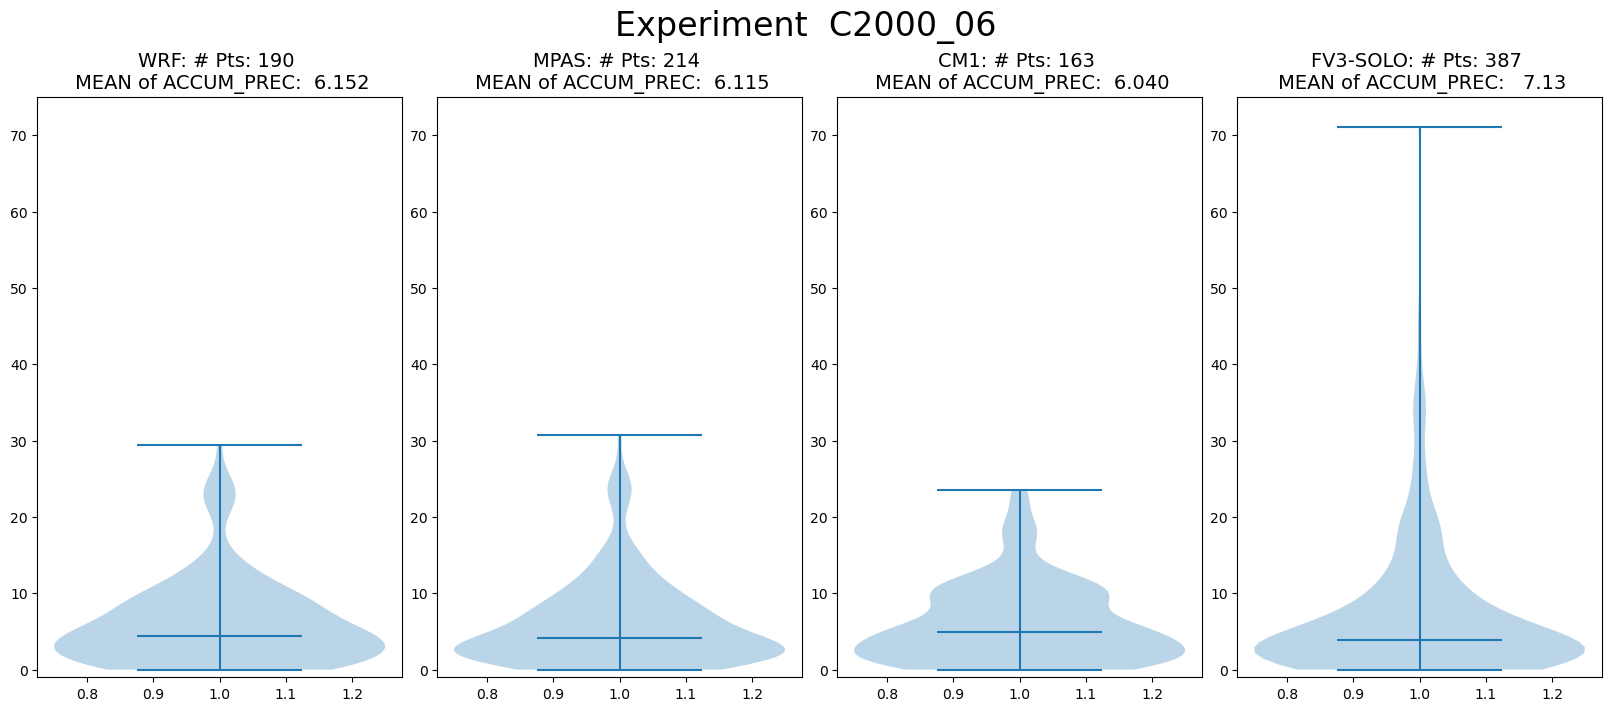

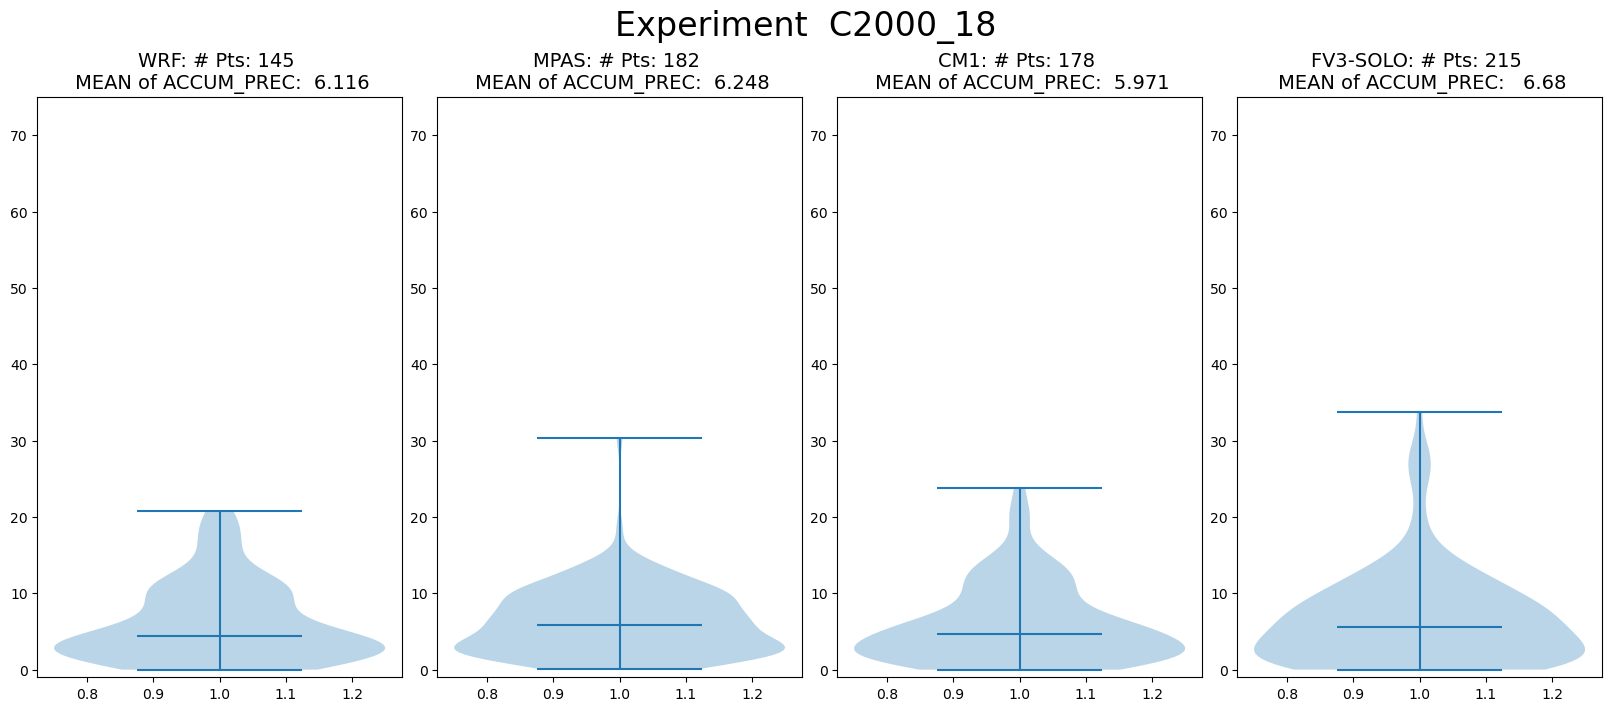

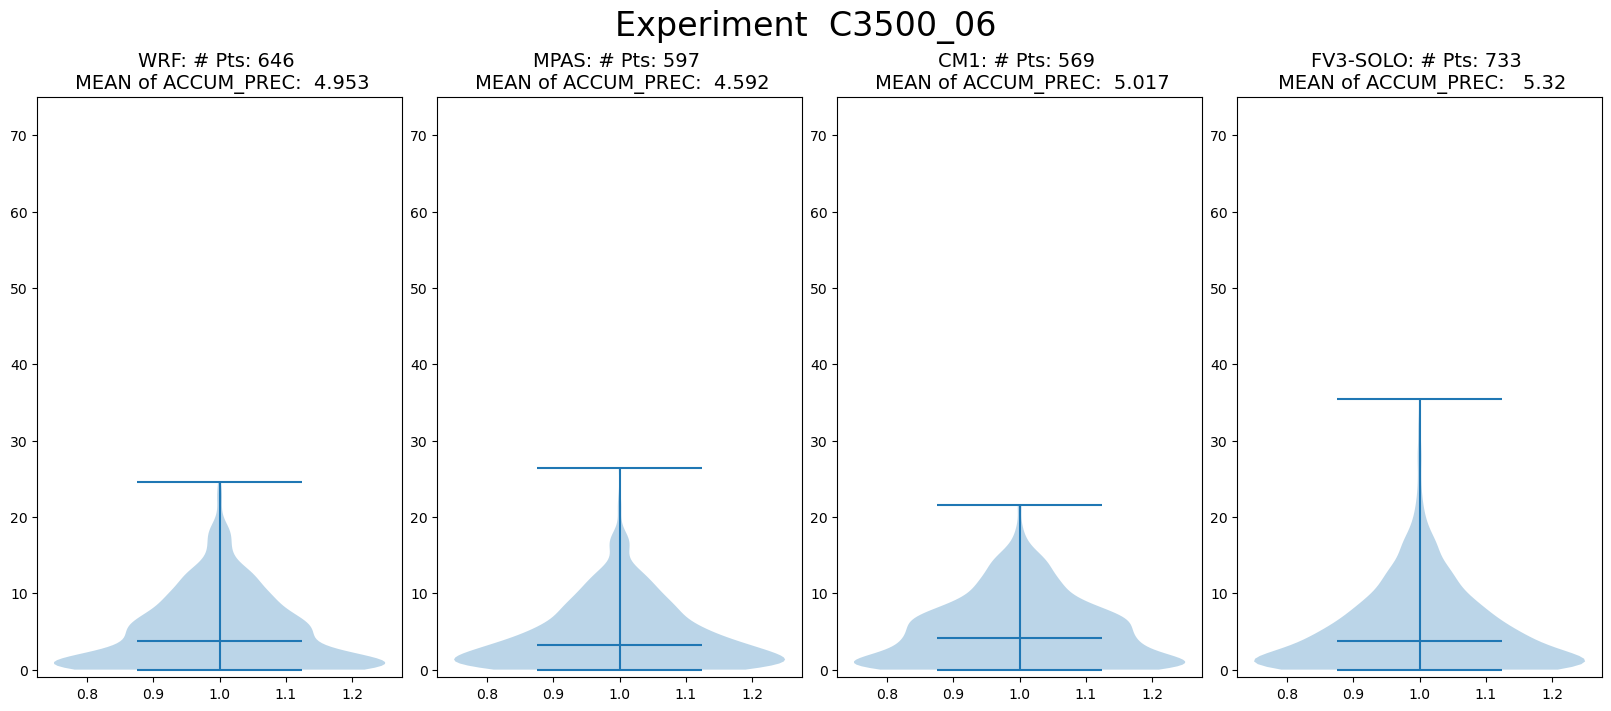

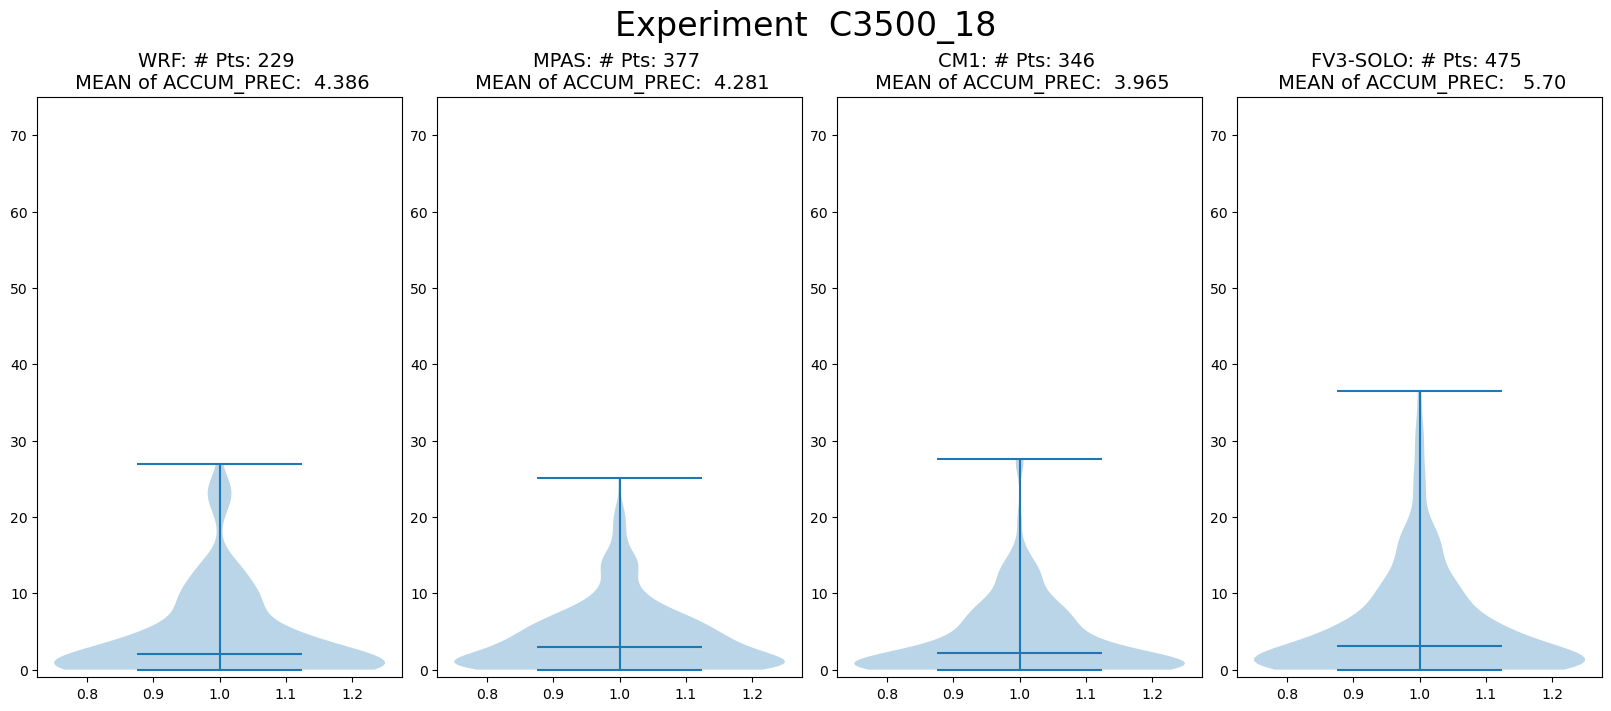

In [53]:
#mk_boxplot(models, var='buoy', max_pix=50, depth=[0,40], ylim=[-0.1,0.1], msize=80, max=False)
mk_boxplot(models, var='accum_prec', max_pix=50, depth=[0,40], ylim=[-1,75], max=False, showmedians=False)
#mk_boxplot(models, max_pix=50, depth=[0,40], ylim=[0,12], max=False)

In [113]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
ds = xa.open_dataset("/work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc", decode_times=False)
# print(ds)

t=20
ds_small=ds.isel(time=t,grid_xt=slice(64,192),grid_yt=slice(64,192))
ds_ref=ds.isel(time=0,grid_xt=0,grid_yt=0)
print(ds_ref['pfull'])

<xarray.DataArray 'pfull' (pfull: 60)>
array([ 43.614677,  50.58378 ,  57.112206,  63.821526,  70.811905,  78.27187 ,
        86.26582 ,  94.8073  , 103.90844 , 113.57964 , 123.82971 , 134.66559 ,
       146.09221 , 158.11314 , 170.72945 , 183.94095 , 197.74487 , 212.13754 ,
       227.1126  , 242.66206 , 258.7766  , 275.44495 , 292.65454 , 310.39114 ,
       328.63913 , 347.38123 , 366.59967 , 386.2756  , 406.3879  , 426.91577 ,
       447.83743 , 469.13055 , 490.77145 , 512.73615 , 535.0022  , 557.545   ,
       580.33923 , 603.3609  , 626.5848  , 649.9866  , 673.54346 , 697.23157 ,
       721.0274  , 744.94727 , 768.9717  , 792.7775  , 815.9177  , 838.1427  ,
       859.33813 , 879.40344 , 898.22766 , 915.7209  , 931.7789  , 946.3301  ,
       959.2798  , 970.566   , 980.1263  , 987.9095  , 994.0884  , 998.4039  ],
      dtype=float32)
Coordinates:
    grid_xt  float32 1.0
    grid_yt  float32 1.0
    time     float32 900.0
  * pfull    (pfull) float32 43.61 50.58 57.11 63.82 ... 98

In [124]:
phalf = ds_small.phalf

ptop  = 100*phalf[0]
phalf = 100*phalf[1:]
phyd  = ds_small.delp.sum(dim="pfull") + ptop

phyd_ref   = ds_ref.delp.sum(dim="pfull") + ptop
psphum     = ((ds_small.spfh)*ds_small.delp).sum(dim="pfull")
psphum_ref = ((ds_ref.spfh)*ds_ref.delp).sum(dim="pfull")

#qp and qn are **weight** per grid cell and not specific ratios
pcond=((ds_small.qp + ds_small.qn)).sum(dim="pfull")

#print(phyd_ref)
print(ds_small.nhpres_pert)

<xarray.DataArray 'nhpres_pert' (pfull: 60, grid_yt: 128, grid_xt: 128)>
array([[[ 3.320312e-02,  5.322266e-02, ...,  5.175781e-02,  3.369141e-02],
        [ 7.812500e-03,  5.859375e-03, ...,  2.783203e-02,  1.708984e-02],
        ...,
        [ 9.765625e-03,  3.466797e-02, ...,  2.246094e-02,  5.761719e-02],
        [ 3.808594e-02,  3.369141e-02, ...,  4.101562e-02,  3.710938e-02]],

       [[ 3.662109e-02,  1.074219e-02, ...,  3.466797e-02,  3.369141e-02],
        [ 3.417969e-02,  7.080078e-02, ...,  2.587891e-02,  3.710938e-02],
        ...,
        [ 2.783203e-02,  2.441406e-02, ...,  4.882812e-02, -5.371094e-03],
        [ 8.300781e-03,  2.246094e-02, ...,  4.296875e-02,  1.220703e-02]],

       ...,

       [[ 9.671875e+00,  1.132031e+01, ..., -2.550781e+01,  1.000000e+01],
        [ 1.359375e+00, -1.075781e+01, ..., -8.742188e+00, -7.125000e+00],
        ...,
        [ 9.632812e+00, -2.117188e+00, ...,  8.820312e+00,  9.578125e+00],
        [ 2.054688e+00,  2.335938e+00, ..., -8

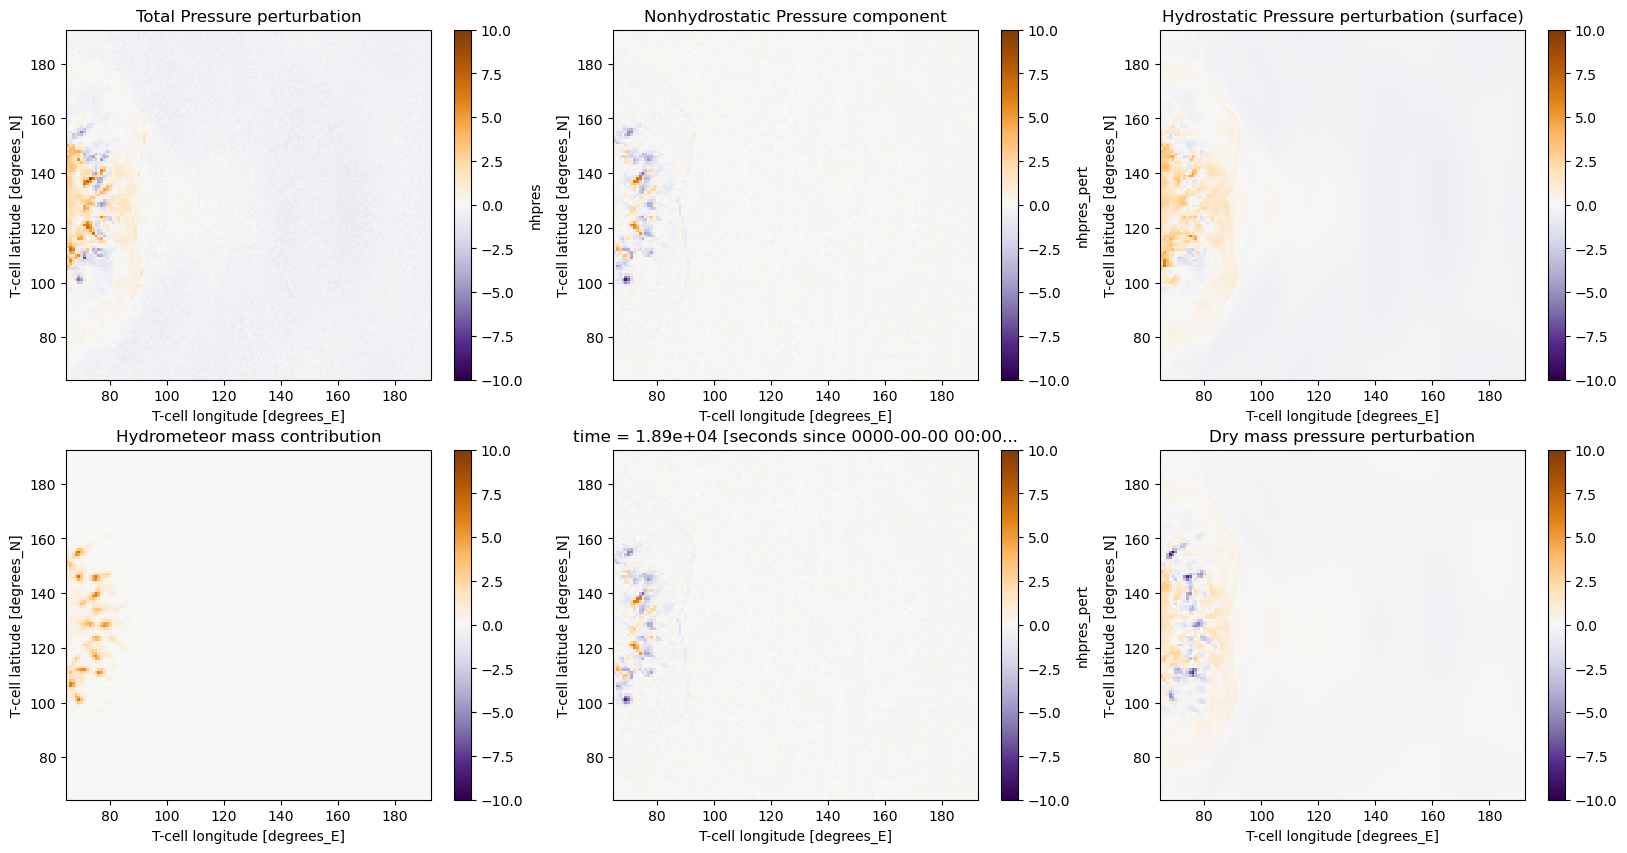

In [127]:
fig = plt.figure(figsize=(20,10))

#nhpres anom
ax = fig.add_subplot(2,3,1)
((ds_small.nhpres[-1,:,:]-ds_ref.nhpres[-1])/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Total Pressure perturbation")

# nhpres_pert
ax = fig.add_subplot(2,3,2)
((ds_small.nhpres_pert[-1,:,:])/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Nonhydrostatic Pressure component")

ax = fig.add_subplot(2,3,3)
((phyd-phyd_ref)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Hydrostatic Pressure perturbation (surface)")

# #hydrometeors
ax = fig.add_subplot(2,3,4)
(pcond/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Hydrometeor mass contribution")

#dry pressure perturbation
ax = fig.add_subplot(2,3,5)
((ds_small.nhpres_pert[-1]/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r')))
ax.set_title("Dry mass pressure perturbation");
#((psphum)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
#ax.set_title("Water vapor mass contribution");

#dry pressure perturbation
ax = fig.add_subplot(2,3,6)
((phyd-(phyd_ref-psphum_ref)-pcond-psphum)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))

ax.set_title("Dry mass pressure perturbation");

# #Add location of cross section
# #NOTE: apparently this behavior will change in a future version of Matplotlib
# #  so if it makes empty plots then just remove it.
# ycross=44
# for n in range(6):
#     ax = fig.add_subplot(2,3,n+1)
#     ax.set_xlabel("")
#     ax.plot(ax.get_xlim(),[ycross,ycross],color='k',linewidth=5,alpha=0.5)